### K - Means

K-means algorithm is the most popular and yet simplest of all the clustering algorithms.

- Select the number of clusters  k  that you think is the optimal number.
- Initialize  k  points as "centroids" randomly within the space of our data.
- Attribute each observation to its closest centroid.
- Update the centroids to the center of all the attributed set of observations.
- Repeat steps 3 and 4 a fixed number of times or until all of the centroids are stable (i.e. no longer change in step 4).
- This algorithm is easy to describe and visualize. Let's take a look.

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("abalone.csv",header=None,names=['Gender','Length','Diameter','Height','Weight','MeatWeight','GutWeight','ShellWeight','Rings'])

In [4]:
df.head()

,Gender,Length,Diameter,Height,Weight,MeatWeight,GutWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df['Gender'].value_counts()

M    1528
I    1342
F    1307
Name: Gender, dtype: int64

In [7]:
df.shape

(4177, 9)

In [10]:
df2 = df.loc[:,'Length':'Rings']
df2.head(2)

,Length,Diameter,Height,Weight,MeatWeight,GutWeight,ShellWeight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


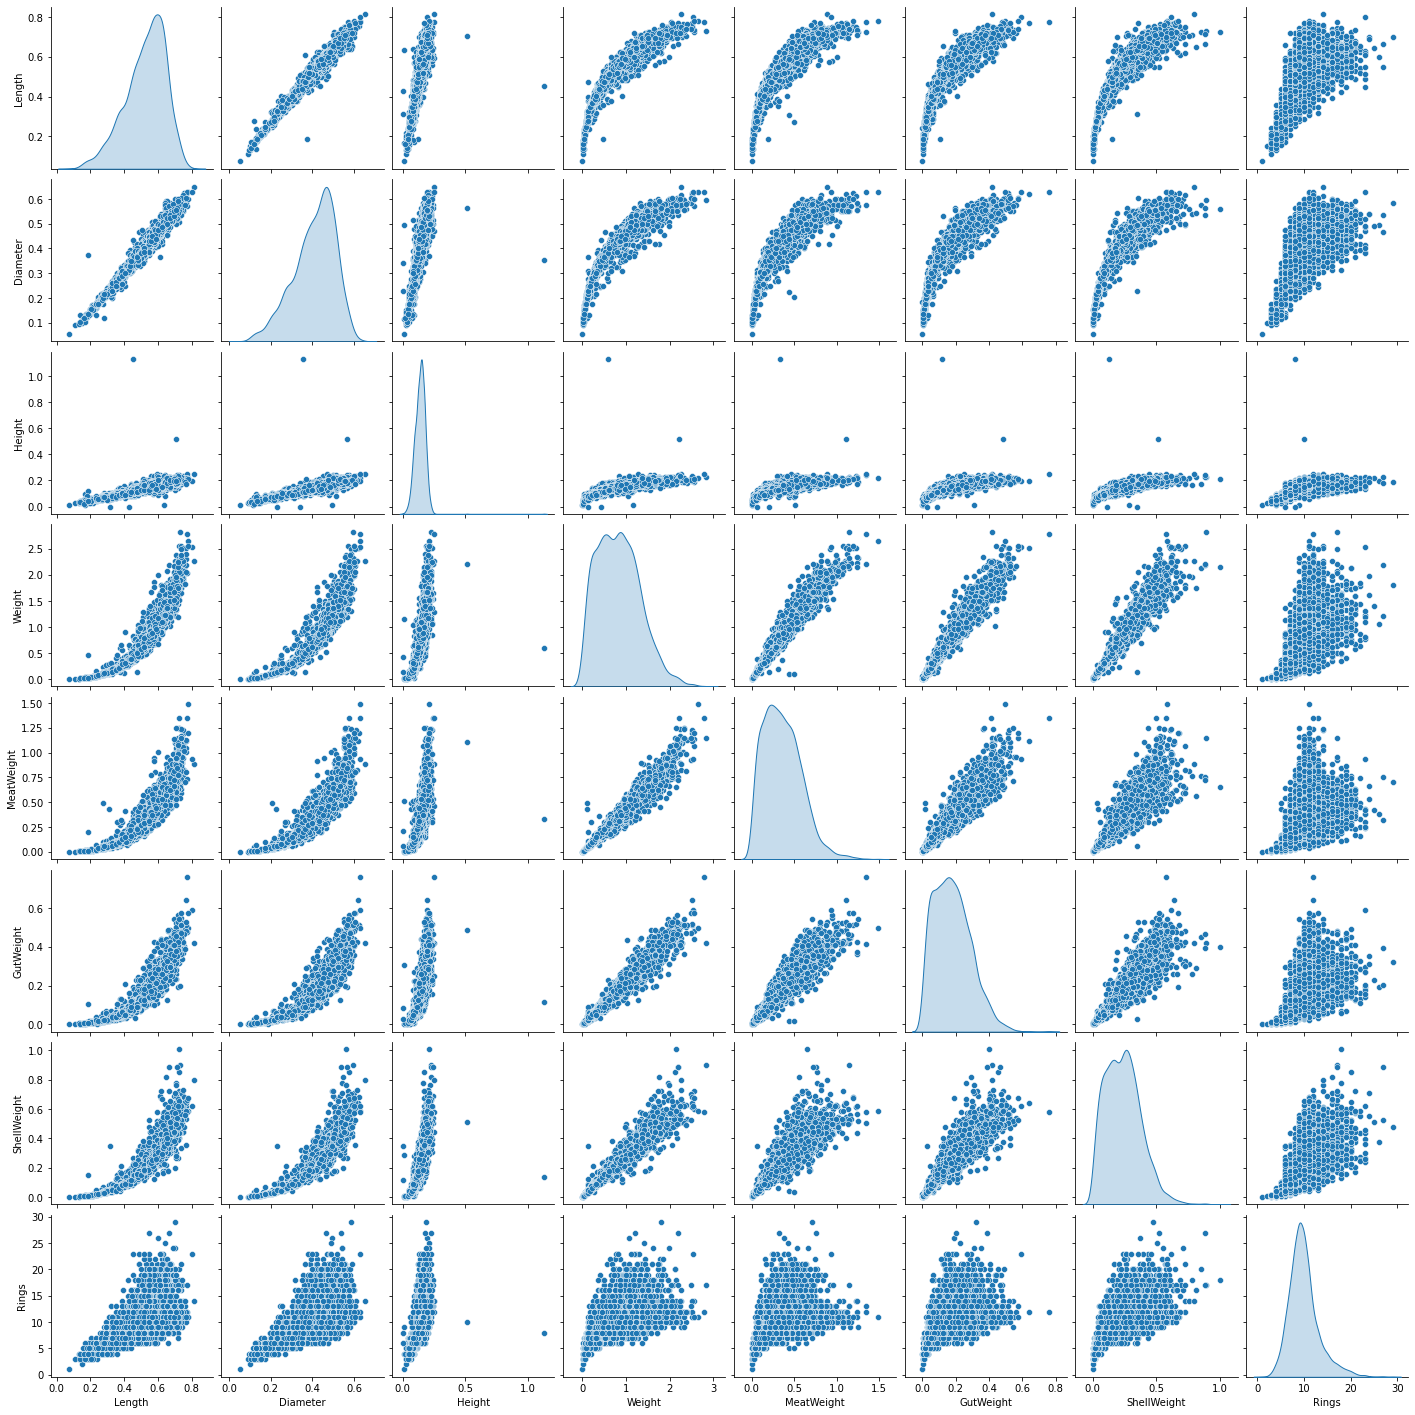

In [11]:
import seaborn as sns
sns.pairplot(df2,diag_kind='kde')

## `This below part is important:`

In [13]:
from scipy.stats import zscore

In [14]:
df_scaled = df2.apply(zscore)

In [15]:
df_scaled.head()

,Length,Diameter,Height,Weight,MeatWeight,GutWeight,ShellWeight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


## `Importing k-means`

In [17]:
from sklearn.cluster import KMeans

In [18]:
model = KMeans(n_clusters=3)

In [19]:
model

KMeans(n_clusters=3)

In [27]:
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters, n_init=10)
    clusters.fit(df_scaled)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,1,33416.000000
1,2,14612.656454
2,3,9923.801398
3,4,7867.602358
4,5,6799.365614
5,6,5837.311675
6,7,5282.173544
7,8,4817.777282
8,9,4288.186327
9,10,3929.021791


## Interpretation.
- The total sum of squared distances of every data point from respective centroid is also called interia.
- Let us print the interia value for all k values.
- That K at which the interia stop to drop significantly (elbow method) will be the best K.

## `Elbow plot.`

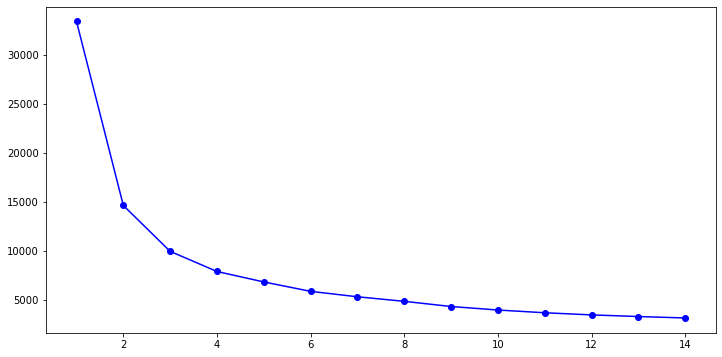

In [32]:
plt.figure(figsize=[12,6])
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')

## Interpreatation:
- **From the Elbow plot we can see that at `K=3`the interia stops to drop significantly. The clusters are labeled as 0,1,2.**

In [33]:
kmeans = KMeans(n_clusters=3, n_init=15, random_state=2345)

In [34]:
kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init=15, random_state=2345)

In [36]:
centroids = kmeans.cluster_centers_

centroids

array([[ 1.04096147,  1.04737608,  0.98711335,  1.22943552,  1.18568669,
         1.20586023,  1.18467026,  0.62605407],
       [-1.26894428, -1.26999291, -1.11407122, -1.13351142, -1.08069942,
        -1.11241216, -1.12339341, -0.84989978],
       [ 0.14406135,  0.1404098 ,  0.07678688, -0.07468114, -0.08038815,
        -0.07282227, -0.0510754 ,  0.14478812]])

In [41]:
centroid_df = pd.DataFrame(centroids, columns=df_scaled.columns)

,Length,Diameter,Height,Weight,MeatWeight,GutWeight,ShellWeight,Rings
0,1.040961,1.047376,0.987113,1.229436,1.185687,1.205860,1.184670,0.626054
1,-1.268944,-1.269993,-1.114071,-1.133511,-1.080699,-1.112412,-1.123393,-0.849900
2,0.144061,0.140410,0.076787,-0.074681,-0.080388,-0.072822,-0.051075,0.144788


In [42]:
centroid_df.index.name = 'Label'

In [43]:
centroid_df.reset_index()

,Label,Length,Diameter,Height,Weight,MeatWeight,GutWeight,ShellWeight,Rings
0,0,1.040961,1.047376,0.987113,1.229436,1.185687,1.205860,1.184670,0.626054
1,1,-1.268944,-1.269993,-1.114071,-1.133511,-1.080699,-1.112412,-1.123393,-0.849900
2,2,0.144061,0.140410,0.076787,-0.074681,-0.080388,-0.072822,-0.051075,0.144788


In [53]:
## Creating a new dataframe only for labels and converting it into categorical variables.
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))

df_labels.head(2)

,Labels
0,2
1,1


In [51]:
df_labels['Labels'] = df_labels['Labels'].astype('category')

In [58]:
## joining the label dataframe with unscaled initial dataframe.(df2)

df_analysis = df2.join(df_labels)

df_analysis.head()

,Length,Diameter,Height,Weight,MeatWeight,GutWeight,ShellWeight,Rings,Labels
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [59]:
df_analysis['Labels'].value_counts()

2    1777
0    1211
1    1189
Name: Labels, dtype: int64